## $\textbf{Finding phot\_g\_mean\_mag of all the T Tauri stars}$

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import seaborn as sn
from tqdm import tqdm
from astroquery.simbad import Simbad


### $\textit{Defining a function for downloading all information from GAIA database}$

In [39]:
# defining a function for extracting data of stars from GAIA database around a choosen Object(Star or Herbig Ae/Be star)

# The function will take input query size, ra, dec of the centered boject and radius of the circle
# It will give output of ojects around that star in table form

def get_GAIA_result(s_id):
    #from astroquery.gaia import Gaia

    query = """SELECT g.source_id, g.ra, g.dec, g.parallax, g.parallax_error, d3.r_med_photogeo, d3.r_lo_photogeo, d3.r_hi_photogeo,(d3.r_hi_photogeo - d3.r_lo_photogeo)/(2 * d3.r_med_photogeo) AS dist_frac, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag, g.bp_rp, g.phot_g_mean_mag + 5*log10(g.parallax) - 10 AS mv, tt.j_m, tt.h_m, tt.ks_m
        FROM gaiadr3.gaia_source as g, gaiadr3.tmass_psc_xsc_best_neighbour as t, tmass_original_valid as tt, external.gaiaedr3_distance AS d3
        WHERE g.source_id IN {}""".format(s_id) + """ AND g.parallax > 0.0 AND
        (g.parallax IS NOT NULL) AND (g.phot_g_mean_mag IS NOT NULL) AND (g.source_id = t.source_id AND t.clean_tmass_psc_xsc_oid = tt.tmass_oid) AND (g.source_id = d3.source_id)
        """

    job = Gaia.launch_job(query)
    result = job.get_results()

    return result


## $\textit{Importing a list of T Tauri stars \\longrightarrow These are Mira stars}$

In [40]:
tauri = pd.read_csv('t tauri.csv')
tauri_star = tauri[["Name", "_RA", "_DE", "mag"]]
tauri_star = tauri_star.sort_values(by='mag')
tauri_star = tauri_star.reset_index(drop=True)
tauri_star
tauri


,recno,Type,Name,Min/Max,HJD,u_HJD,Obs,mag,u_mag,Obsev,Nmeas,_RA,_DE
0,1,M,R And,Max,54655,,vis,7.25,,"Winkler, R.",25,6.00816,38.57712
1,2,M,R And,Max,54662,:,vis,6.90,:,"Neumann, J.",11,6.00816,38.57712
2,3,M,W And,Min,54841,,vis,13.60,,"Marx, H.",15,34.38734,44.30494
3,4,M,TU And,Min,54806,,vis,13.20,,"Marx, H.",12,8.09472,26.02943
4,5,M,YZ And,Max,54711,,vis,10.50,,"Marx, H.",9,6.80937,30.89676
5,6,M,T Aqr,Max,54664,:,vis,7.50,:,"Neumann, J.",8,312.48504,-5.14664
6,7,M,RT Aql,Max,54755,,vis,8.70,,"Marx, H.",10,294.50666,11.72176
7,8,M,RU Aql,Min,54726,,vis,14.50,,"Marx, H.",13,303.18675,12.99481
8,9,M,RV Aql,Min,54760,,vis,14.60,,"Marx, H.",10,295.17942,9.93094
9,10,M,SV Aql,Max,54777,,vis,11.50,,"Marx, H.",9,294.75729,11.94622


### $\textit{Making a list of name for T Tauri stars}$

In [41]:
name_t_tauri = tauri_star["Name"]
name_t_tauri = list(name_t_tauri)
name_t_tauri = list(set(name_t_tauri))
len(name_t_tauri)


109

In [42]:
name_t_tauri


['X Mon',
 'SW Vir',
 'R Tri',
 'S CMi',
 'RR Ori',
 'rho Per',
 'T Cep',
 'AS Her',
 'R Boo',
 'S Lyr',
 'W And',
 'UV Aur',
 'RR Boo',
 'RV Her',
 'W Sge',
 'RY UMa',
 'RR Aur',
 'RW Cep',
 'W Lyr',
 'W Dra',
 'RU Aql',
 'RX Psc',
 'RX Per',
 'RS UMa',
 'X Dra',
 'U Ori',
 'U Mon',
 'S CrB',
 'IN Hya',
 'RU Lyr',
 'Z Tau',
 'SS Del',
 'R Aur',
 'SV Aql',
 'T Her',
 'U Del',
 'TU And',
 'NZ Gem',
 'XY Lyr',
 'V465 Cas',
 'X CrB',
 'Y Dra',
 'T Aqr',
 'V Cas',
 'RX Boo',
 'RV Dra',
 'RT Aql',
 'RY Dra',
 'chi Cyg',
 'X Peg',
 'Z Cyg',
 'PS Gem',
 'RT Cyg',
 'RV Aql',
 'SY Her',
 'RY Her',
 'AF Cyg',
 'RU Del',
 'WZ Cas',
 'R CMi',
 'WY Cas',
 'VY UMa',
 'X Cet',
 'X Cnc',
 'RR CrB',
 'R Cas',
 'AX Mon',
 'S Cep',
 'QZ Aql',
 'AB Cep',
 'SU Vir',
 'eta Gem',
 'T UMi',
 'T UMa',
 'RU Aur',
 'R Leo',
 'YZ And',
 'RT Boo',
 'DL Psc',
 'S Boo',
 'FH Vir',
 'FU Her',
 'ZZ Dra',
 'Z Psc',
 'R Vir',
 'FP Vir',
 'FF Peg',
 'R UMa',
 'Y UMa',
 'WZ Her',
 'R Dra',
 'ST UMa',
 'RS Vir',
 'CF Her',

In [43]:
# Cheaking the source_id

result_table = Simbad.query_objectids(name_t_tauri[79])
kk = list(result_table[0])
lp = np.shape(result_table)
lp[0]


26

### $\textit{Defining a function which will find GAIA DR3/DR2 source\_id of Star}$

In [44]:
def get_source_id(objects_name):
    """ Make a list of name for all the objects of which you want the source id"""
    """ It will return a tuple of all objects having source_id of Gaia DR2 or DR3 table"""

    source_id = []
    for index, name in tqdm(enumerate(objects_name)):

        result_table = Simbad.query_objectids(name)
        lp = np.shape(result_table)

        if lp[0] == 0:
            continue
        else:
            ch = []

            for element in result_table:
                ll = list(element)
                mp = "".join(ll)
                nl = mp.split(" ")
                ch.append(nl)

            sor_id = []

            for i in range(len(ch)):

                for j in range(len(ch[i])):

                    if (ch[i][0] == 'Gaia' and ch[i][1] == 'DR3'):
                        sor_id.append(ch[i][-1])

                    elif (ch[i][0] == 'Gaia' and ch[i][1] == 'DR2'):
                        sor_id.append(ch[i][-1])

            sor_id = list(set(sor_id))
            id = int(sor_id[0])
            # print(index, id)
            source_id.append(id)

    source_id = tuple(source_id)
    return source_id


In [45]:
source_id_t_tauri = get_source_id(name_t_tauri)


109it [00:00, 378.27it/s]


In [46]:
source_id_t_tauri


(3050679330064623744,
 3684575344281510912,
 134874621777526400,
 3143124657116728448,
 3349083629043128320,
 142853330981309440,
 2270451142963759744,
 4462086161412654720,
 1279554668255201152,
 2036190432497153280,
 351930930201512832,
 180919213811383680,
 1488516337718912768,
 1310298456477806976,
 4514868354559419776,
 1581846389377539200,
 960388432945742464,
 2005992002061917312,
 4606769556482044800,
 2161655188947776000,
 1803426702822835328,
 289412252367920768,
 217167225960380928,
 1578252395103625856,
 2257735668945125760,
 3399013173615356160,
 3035408251728251520,
 1277100833181749760,
 3842342137447011200,
 2102179508331188736,
 3348064347406026880,
 1756091524655523072,
 266367210206027776,
 4315206217038334848,
 4591149275824008960,
 1813013108479261312,
 2807775362988454528,
 3164322073068316800,
 2098074279806975488,
 413463586628312448,
 1372970619261887104,
 1130951204996402048,
 6913517223245165696,
 2013777609520855680,
 1256239111870681600,
 168048498625409523

In [47]:
t_tauri_list = get_GAIA_result(source_id_t_tauri)


In [48]:
# pd.set_option('display.max_rows', None)


In [49]:
t_tauri_list[55:65]


source_id,ra,dec,parallax,parallax_error,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,dist_frac,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,j_m,h_m,ks_m
,deg,deg,mas,mas,pc,pc,pc,,mag,mag,mag,mag,,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32,float32,float64,float32,float32,float32,float32,float64,float32,float32,float32
2270451142963759744,317.38189524895535,68.49069786975204,5.439977069004045,0.34755653,--,--,--,--,4.64416,8.75674,3.0874825,5.669257,-1.6778548609880595,13.834,13.529,13.52
2284711568256711040,323.803616994219,78.62449919623116,2.0452081051447313,0.06974938,487.71313,473.76666,502.68842,0.029650373209228937,6.2182875,8.815923,5.0196185,3.7963042,-2.228025006224664,14.496,13.907,13.778
2662455625565532672,347.80866191861065,5.004313633338974,3.9005842759682565,0.23438399,256.53885,242.46046,274.5798,0.06260131580434354,4.6237364,7.0067134,3.310419,3.6962943,-2.4206152899735525,16.58,15.9,15.403
2761479257670329856,354.04300959987967,9.816035392156643,0.19712907730236637,0.070528634,--,--,--,--,10.870509,14.866846,9.45447,5.4123764,-2.655737406743296,11.306,10.768,10.655
2807775362988454528,8.094664343624546,26.02940859132059,0.9435398949820365,0.062345706,--,--,--,--,7.6984363,11.126775,6.04851,5.0782647,-2.4277624006091463,15.869,15.17,14.938
2859182101432492800,6.809339451534087,30.896727338643906,0.39098260940475105,0.09596546,--,--,--,--,10.941608,14.774063,9.563562,5.2105007,-1.0976043672819422,16.948,15.947,15.59
3035408251728251520,112.69776071674808,-9.776871476180396,1.2777846578288274,0.11961468,773.094,718.59503,846.7924,0.0829119024768892,5.807805,6.2577844,5.037313,1.2204714,-3.659906592070209,14.877,14.009,13.673
3050679330064623744,104.29921684702742,-9.064569887188762,1.583378311536651,0.03679909,618.8044,605.3896,631.8661,0.0213932724307789,6.934664,8.549494,5.648128,2.9013658,-2.0674127681286727,14.071,13.482,13.455


## Checking Nebular Features in DSS2/red, ALLWISE
-----------------------------------------------------------------
          RA                  DEC       Surrounding Features   
------------------------------------------------------------------
80.45379886765122   32.51114593645008   At the end of Nebula
85.0329079628597    37.636291700195756  far from Nebula
57.81769776450538   33.03523000299736   appears some Nebula far away from it/ Just at the boundary
79.32370881178429   53.586054712570004  No nebula
21.41323614789844   21.39610010464045   No Nebula
19.020928530581568  25.769353670465282  No Nebula
34.3873374753859    44.30492139458615   No Nebula
6.008016192734226   38.576901510648135  No Nebula
19.55779304162413   57.80316285738621   No Nebula 
270.3814805717677   18.721939263924227  No Nebula #
278.39178616917366  16.10152031851541   No Nebula
289.8847767080834   17.205374678761316  No Nebula
277.5676514759273   21.86682949603858   No Nebula
269.936642047212    19.481728367867706  No Nebula (Some dust in DSS2/red at viewing angle 15 degrees)
266.2241030121111   21.496324012349817  No Nebula
269.6007758979661   23.444498100754544  No Nebula
272.2758692117901   31.021198811901296  No Nebula
273.7328478571858   36.67030094322062   No nebula
312.48501481355714  -5.146681789425861  No Nebula
71.42579175532539   75.10092458852459   No Nebula
133.84533174450627  17.23130175808034   No Nebula
171.95985103758377  45.18513699581265   No Nebula
93.03412860491798   43.164328362417756  No Nebula
161.2668583704658   67.41138641641032   No Nebula
161.15980213911476  68.77563600058032   No Nebula
145.59474964867732  77.85199925317058   No Nebula
216.04853685161495  25.703504548307073  No Nebula
230.34976104471792  31.36732943534391   No Nebula
332.79521577912124  55.28176491637531   No Nebula
335.77920139127536  55.96321618744095   Partial nebulae (A nebula close to it) 
295.2375393105248   32.61825718605574   No Nebula
297.641211416513    32.91386547640731   No Nebula
288.29915803583     26.00768491003986   No Nebula
287.32535320757	    29.54975031489673   No Nebula
300.36470871973     50.04235847019591	No Nebula
279.52701749028	    39.66836302692522   No Nebula
288.0885640734903	41.30372426899433   No Nebula
292.55384519705706	46.147777198119975  No Nebula
317.38189524895535	68.49069786975204   No Nebula (A nebula close to it)
323.803616994219	78.62449919623116   No Nebula
347.80866191861065	5.004313633338974   No Nebula
354.04300959987967	9.816035392156643   No Nebula
8.094664343624546	26.02940859132059	No Nebula
6.809339451534087	30.896727338643906  No Nebula
104.29921684702742	-9.064569887188762  No Nebula (Lots of nebula surrounding it ) ALLWISE

### $\textit{Importing all herbig stars}$

In [50]:
all_herbig = pd.read_csv("all_herbig star.csv")
herbig_star = all_herbig[["Name", "RAICRS",
                          "DEICRS", "Dist", "E_Dist", "e_Dist"]]
herbig_star = herbig_star.sort_values(by='Dist')
herbig_star = herbig_star.reset_index(drop=True)


In [51]:
name_herbig_stars = herbig_star["Name"]
name_herbig_stars = list(name_herbig_stars)


In [52]:
def get_source_id_herb(objects_name):
    """ Make a list of name for all the objects of which you want the source id"""
    """ It will return a tuple of all objects having source_id of Gaia DR2 or DR3 table"""

    restricted_index = [16, 28, 30, 33, 69, 74,
                        90, 102, 128, 131, 138, 158, 166, 210]
    source_id = []
    for index, name in tqdm(enumerate(objects_name)):
        if all([index != ind for ind in restricted_index]):
            # if index != 16 and index != 28 and index != 30 and index != 158 and index != 166 and index != 210  and index != 131 and index != 138 and index != 33 and index != 69 and index != 74 and index != 90 and index != 102 and index != 128:

            result_table = Simbad.query_objectids(name)
            lp = np.shape(result_table)

            if lp[0] == 0:
                continue
            else:
                ch = []

                for element in result_table:
                    ll = list(element)
                    mp = "".join(ll)
                    nl = mp.split(" ")
                    ch.append(nl)

                sor_id = []

                for i in range(len(ch)):

                    for j in range(len(ch[i])):

                        if (ch[i][0] == 'Gaia' and ch[i][1] == 'DR3'):
                            sor_id.append(ch[i][-1])

                        elif (ch[i][0] == 'Gaia' and ch[i][1] == 'DR2'):
                            sor_id.append(ch[i][-1])

                sor_id = list(set(sor_id))
                id = int(sor_id[0])
                # print(index, id)
                source_id.append(id)

    source_id = tuple(source_id)
    return source_id


In [53]:

herbig_source_id = get_source_id_herb(name_herbig_stars)


218it [00:00, 476.62it/s]


In [54]:
# Cheaking the source_id

result_table = Simbad.query_objectids(name_herbig_stars[30])
# kk = list(result_table[0])
lp = np.shape(result_table)
result_table


/home/priyatam/anaconda3/lib/python3.9/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 2 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : HD  56895B
  warnings.warn("Warning: The script line number %i raised "


In [55]:
herbig_star_list = get_GAIA_result(herbig_source_id)


In [56]:
herbig_star_list


source_id,ra,dec,parallax,parallax_error,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,dist_frac,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,j_m,h_m,ks_m
,deg,deg,mas,mas,pc,pc,pc,,mag,mag,mag,mag,,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32,float32,float64,float32,float32,float32,float32,float64,float32,float32,float32
120035647206281344,54.75234361567181,29.69601377527046,2.540488499385927,0.023012837,389.46735,385.65085,392.75806,0.00912426718369894,10.57882,10.776685,10.232003,0.54468155,2.603406394726486,16.659,15.998,15.574
121406905707934464,52.33243995235641,31.415803700393415,3.480240174773962,0.023667121,284.68234,282.97147,286.77505,0.006680408825840805,10.32428,10.698151,9.74056,0.95759106,3.0323258654923038,14.546,14.047,13.917
156728858488206080,74.69279709310177,29.843495814863648,6.401440951320787,0.051843658,155.2827,153.91815,156.49043,0.008282573946306465,7.6539664,7.739581,7.4561844,0.28339672,1.6853551458072271,17.338,16.123,15.317
156917493449670656,73.94104529388767,30.551085459021337,6.41270938818611,0.037198894,154.98276,154.0313,155.89375,0.0060085950999069606,7.1112337,7.16187,6.891851,0.27001905,1.1464415060519109,16.797,16.058,15.829
217510685903279872,55.19570348092368,32.53154462451507,3.4455715239592535,0.030337175,287.27246,284.85007,289.79626,0.008608896052242434,10.285868,10.476857,9.940728,0.536129,2.972174038680784,11.039,10.352,10.224
422867640861343744,2.406570998713692,58.21964776936885,1.3094221802473236,0.08050267,756.87933,719.5067,818.44794,0.06536129259040066,13.87631,14.183197,13.250406,0.93279076,4.46170881423212,15.714,14.994,14.856
427582411138427904,10.855576428559038,61.63980140184699,0.3741042975885618,0.01300705,2499.6755,2411.8037,2586.6272,0.034969235753351195,13.006534,13.865889,12.074357,1.7915316,0.8714971090451726,14.344,13.79,13.522
427618149568528384,10.826100313516564,61.91114025127389,1.7921123434016812,0.013710441,551.09955,546.933,555.3368,0.007624583089449083,10.266892,10.6662035,9.638834,1.0273695,1.533718588675736,16.13,15.884,15.324


### $\textit{Plotting histogram of phot\_g\_mean\_mag for both T-Tauri and Herbig Ae/Be stars}$

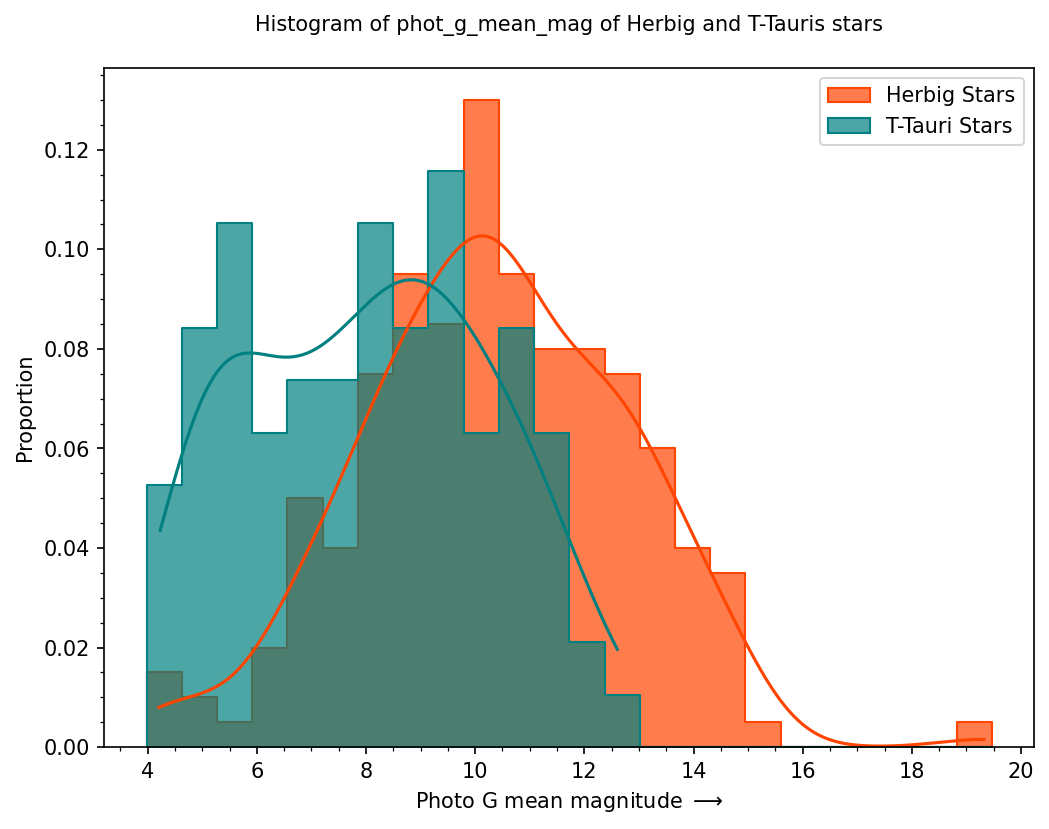

In [57]:
bin_interval = np.linspace(min(
    t_tauri_list["phot_g_mean_mag"])-0.25, max(herbig_star_list["phot_g_mean_mag"])+0.15, 25)

fig, ax = plt.subplots(dpi=150, figsize=[8, 6])
sn.histplot(herbig_star_list["phot_g_mean_mag"], bins=bin_interval, stat='proportion',
            color="#FF4500", element='step', alpha=0.7, kde=True, label="Herbig Stars")
sn.histplot(t_tauri_list["phot_g_mean_mag"], bins=bin_interval, stat='proportion',
            color="#008080", element='step', alpha=0.7, kde=True, label="T-Tauri Stars")
ax.legend()
ax.minorticks_on()
ax.set_xlabel(r"Photo G mean magnitude $\longrightarrow$")
ax.set_title(
    "Histogram of phot_g_mean_mag of Herbig and T-Tauris stars\n", fontsize=10)
plt.savefig("photo_g.jpg", dpi=400)
plt.show()


## $\textbf{Importing T Tauri stars}$

In [58]:
tauri_x = pd.read_csv("t tauri stars.csv")


In [67]:
name_x = tauri_x["SimbadName"]


In [126]:
def get_source_id_tauri(objects_name):
    """ Make a list of name for all the objects of which you want the source id"""
    """ It will return a tuple of all objects having source_id of Gaia DR2 or DR3 table"""

    restricted_index = [6, 10, 25, 27, 29, 34, 40, 69, 86, 97,
                        104, 113, 116, 117, 121, 137, 139, 161, 181, 185, 193, 196, 199, 218, 232, 260, 268, 278, 280, 294, 296, 302, 
                        317, 327, 331]
    source_id = []
    for index, name in tqdm(enumerate(objects_name)):
        if all([index != ind for ind in restricted_index]):
            # if index != 16 and index != 28 and index != 30 and index != 158 and index != 166 and index != 210  and index != 131 and index != 138 and index != 33 and index != 69 and index != 74 and index != 90 and index != 102 and index != 128:

            result_table = Simbad.query_objectids(name)
            lp = np.shape(result_table)

            if lp[0] == 0:
                continue
            else:
                ch = []

                for element in result_table:
                    ll = list(element)
                    mp = "".join(ll)
                    nl = mp.split(" ")
                    ch.append(nl)

                sor_id = []

                for i in range(len(ch)):

                    for j in range(len(ch[i])):

                        if (ch[i][0] == 'Gaia' and ch[i][1] == 'DR3'):
                            sor_id.append(ch[i][-1])

                        elif (ch[i][0] == 'Gaia' and ch[i][1] == 'DR2'):
                            sor_id.append(ch[i][-1])

                sor_id = list(set(sor_id))
                id = int(sor_id[0])
                # print(index, id)
                source_id.append(id)

    source_id = tuple(source_id)
    return source_id





In [127]:
source_id_tx = get_source_id_tauri(name_x)

372it [00:00, 504.54it/s]


In [128]:
len(source_id_tx)

337

In [75]:
result_table = Simbad.query_objectids(name_x[6])
result_table


ID
bytes24
VISION J05334479-0514099
WISE J053344.79-051409.9
TIC 427334200
2MASS J05334479-0514098
CSV 6200
HPRA 201
Haro 4-101
Kiso A-0976 53
PACH 67


In [129]:
list_tauri = get_GAIA_result(source_id_tx)

In [130]:
list_tauri

source_id,ra,dec,parallax,parallax_error,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,dist_frac,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,j_m,h_m,ks_m
,deg,deg,mas,mas,pc,pc,pc,,mag,mag,mag,mag,,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32,float32,float64,float32,float32,float32,float32,float64,float32,float32,float32
3017195593225089152,84.08226693196755,-5.806561399651977,2.610324942905403,0.08175338,376.95724,364.68167,390.50208,0.03424845178586536,16.915049,18.38197,15.59503,2.7869396,8.998521465679318,16.373,14.867,14.27
3017199755050720384,83.9870938368677,-5.755332741810977,3.9777703691390345,0.45560417,245.38881,223.79863,272.26944,0.09876328528129405,16.28562,17.780148,14.840106,2.9400415,9.283818277354307,13.08,11.85,11.482
3017200339166252288,84.04307434102134,-5.707523364987893,2.521509293967514,0.036276124,387.97574,383.27444,393.8086,0.01357578338527021,15.500696,16.809914,14.299551,2.5103626,7.508999048516877,16.838,15.705,15.228
3017200510964946048,84.03042150496411,-5.706033231981947,2.5414964729607545,0.015053099,387.4733,385.62405,389.43396,0.00491634653818209,13.232972,13.917264,12.405818,1.511446,5.2584197017492045,14.443,13.843,13.622
3017200545324683520,84.0275398113055,-5.698425872413027,2.5382260485598795,0.08937061,386.15765,371.5133,399.78195,0.03660246787992743,16.628145,17.626947,15.291996,2.3349514,8.650796701627073,17.26,14.914,14.193
3017240020367621504,83.72877509510568,-5.785846115953342,2.3357828218972334,0.11636231,412.97296,394.66656,434.8482,0.04864923902799066,17.657099,19.385977,16.26752,3.118456,9.499261070998532,16.1,15.393,15.353
3017240157805799168,83.74680625802655,-5.766359085722285,1.4906789995017324,0.14264736,661.5158,603.28656,731.5325,0.09693336808671121,16.146252,17.873209,14.69321,3.1799994,7.013172344578049,16.698,15.853,15.321
3017241227254832128,83.641530296376,-5.806924140705196,1.7247464587852739,0.55092394,546.2937,451.51944,735.1716,0.25961504728910506,16.642462,18.022486,15.170786,2.8516998,7.826088086407676,16.145,15.301,14.831


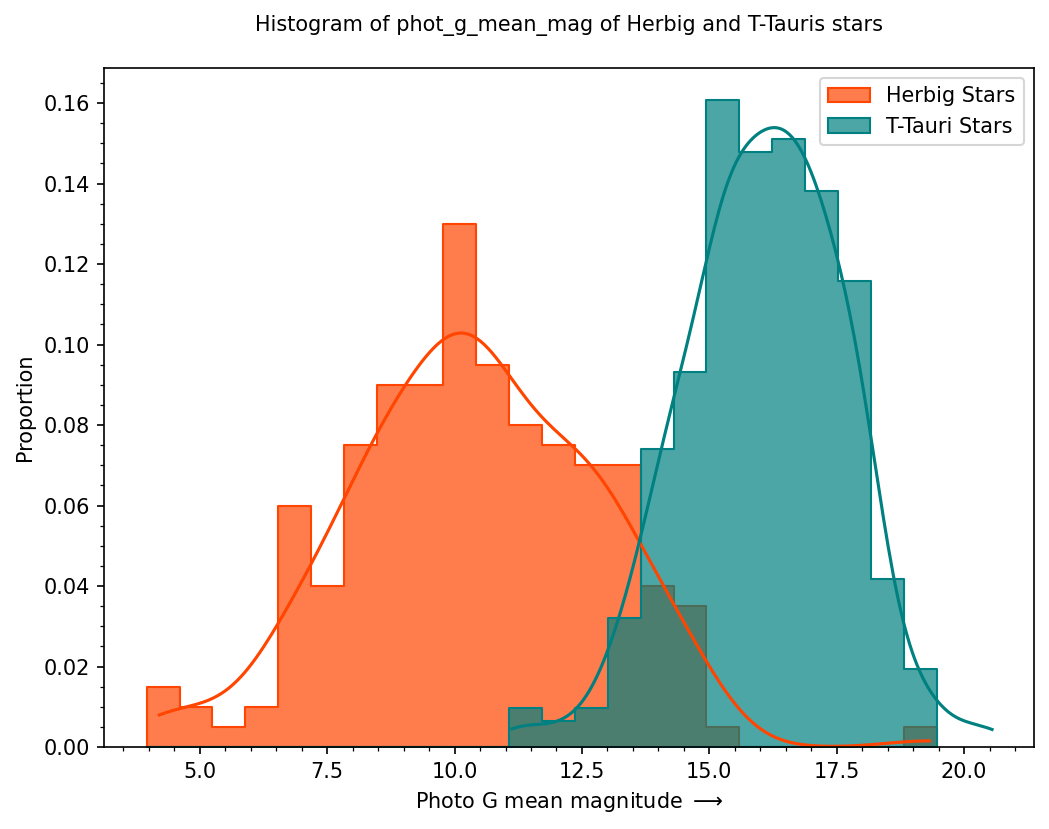

In [132]:
bin_interval = np.linspace(min(
    herbig_star_list["phot_g_mean_mag"])-0.25, max(herbig_star_list["phot_g_mean_mag"])+0.15, 25)

fig, ax = plt.subplots(dpi=150, figsize=[8, 6])
sn.histplot(herbig_star_list["phot_g_mean_mag"], bins=bin_interval, stat='proportion',
            color="#FF4500", element='step', alpha=0.7, kde=True, label="Herbig Stars")
sn.histplot(list_tauri["phot_g_mean_mag"], bins=bin_interval, stat='proportion',
            color="#008080", element='step', alpha=0.7, kde=True, label="T-Tauri Stars")
ax.legend()
ax.minorticks_on()
ax.set_xlabel(r"Photo G mean magnitude $\longrightarrow$")
ax.set_title(
    "Histogram of phot_g_mean_mag of Herbig and T-Tauris stars\n", fontsize=10)
# plt.savefig("photo_g.jpg", dpi=400)
plt.show()